In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# to show the plots in notebook
%matplotlib inline 

# Data Preperation

Most of data preperation and cleaning has already been done by creator. I am just trying to understand data

In [142]:
df = pd.read_csv('diabetes_binary_5050split_BRFSS2015.csv')

In [143]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [144]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [145]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [146]:
#since no columns have na , count of any of them gives total count
df.groupby('Diabetes_binary')['HighBP'].count()

Diabetes_binary
0.0    35346
1.0    35346
Name: HighBP, dtype: int64

In [147]:
for col in list(df.columns):
    print(col)
    print(df[col].describe())
    print("null count: " + str(df[col].isna().sum()))
    print("unique values: " + str(df[col].nunique()))
    print()

Diabetes_binary
count    70692.000000
mean         0.500000
std          0.500004
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: Diabetes_binary, dtype: float64
null count: 0
unique values: 2

HighBP
count    70692.000000
mean         0.563458
std          0.495960
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HighBP, dtype: float64
null count: 0
unique values: 2

HighChol
count    70692.000000
mean         0.525703
std          0.499342
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HighChol, dtype: float64
null count: 0
unique values: 2

CholCheck
count    70692.000000
mean         0.975259
std          0.155336
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CholCheck, dtype: float64
null count: 0
unique values:

In [148]:
for col in list(df.columns):
    if(df[col].nunique() == 2):
        print(col)

Diabetes_binary
HighBP
HighChol
CholCheck
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
DiffWalk
Sex


In [149]:
df.BMI.value_counts()

BMI
27.0    6327
26.0    4975
28.0    4583
24.0    4392
30.0    4344
        ... 
85.0       1
83.0       1
80.0       1
78.0       1
74.0       1
Name: count, Length: 80, dtype: int64

In [150]:
#BMI greater than 40 is morbidly obese. So there could be problems with values grater than 55
len(df[df.BMI > 55.0])

445

In [151]:
#remove these values
df = df[df.BMI <= 55.0]
df.shape

(70247, 22)

In [152]:
df.groupby('Diabetes_binary')['HighBP'].count()

Diabetes_binary
0.0    35222
1.0    35025
Name: HighBP, dtype: int64

In [153]:

df[df.duplicated()]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
602,0.0,0.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
689,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
891,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,6.0,8.0
1092,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
1326,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
69939,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
70305,1.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0
70591,1.0,1.0,1.0,1.0,30.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0


In [154]:
df = df.drop_duplicates(keep='first')

In [155]:
df.groupby('Diabetes_binary')['HighBP'].count()

Diabetes_binary
0.0    33836
1.0    34776
Name: HighBP, dtype: int64

In [156]:
#save cleaned data

df.to_csv("cleaned_data.csv", index=False)

Checking for duplicates. Found out there are duplicated rows during decision tree modeling

# Setting up validation framework

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
df = pd.read_csv("cleaned_data.csv")

In [232]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [233]:
len(df_train), len(df_val), len(df_test)

(41166, 13723, 13723)

In [234]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [235]:
y_train = df_train.Diabetes_binary.values
y_val = df_val.Diabetes_binary.values
y_test = df_test.Diabetes_binary.values

print(y_train)

[1. 1. 0. ... 0. 1. 0.]


# EDA and feature extraction

In [192]:
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [193]:
numerical_variables = ['BMI']
binary_categorical_variables = [
'HighBP',
'HighChol',
'CholCheck',
'Smoker',
'Stroke',
'HeartDiseaseorAttack',
'PhysActivity',
'Fruits',
'Veggies',
'HvyAlcoholConsump',
'AnyHealthcare',
'NoDocbcCost',
'DiffWalk',
'Sex'
]
other_categorical_variables = [
'GenHlth',
'MentHlth',
'PhysHlth',
'Age',
'Education',
'Income'
]
all_variables = list(df_full_train.columns)
all_variables.remove('Diabetes_binary')
y_full_train = df_full_train.Diabetes_binary.values

In [194]:
print(all_variables)
discrete_variables = [(x not in numerical_variables) for x in all_variables]
print(discrete_variables)
print(len(all_variables))

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
[True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
21


### Mutual info classification for feature selection

In [195]:
from sklearn.feature_selection import mutual_info_classif
threshold = 20  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(df_full_train[all_variables], y_full_train,
                                     discrete_features= discrete_variables, random_state=0)
for score, f_name in sorted(zip(feature_scores, all_variables), reverse=True)[:threshold]:
        print(f_name, round(score,5))
        high_score_features.append(f_name)

GenHlth 0.08762
HighBP 0.07057
BMI 0.05187
Age 0.0472
HighChol 0.04
DiffWalk 0.03566
PhysHlth 0.02424
Income 0.02386
HeartDiseaseorAttack 0.02279
Education 0.01344
PhysActivity 0.01114
Stroke 0.00805
CholCheck 0.00788
HvyAlcoholConsump 0.00498
MentHlth 0.00438
Smoker 0.00299
Veggies 0.00256
Fruits 0.00108
Sex 0.00105
NoDocbcCost 0.00049


In [196]:
print(high_score_features[:10])

['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'PhysHlth', 'Income', 'HeartDiseaseorAttack', 'Education']


In [197]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_feature_score = []
sorted_roc_features = []
#with roc curve
for c in all_variables:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    roc_feature_score.append(auc)
    
for score, f_name in sorted(zip(roc_feature_score, all_variables), reverse=True)[:20]:
        print('%16s, %.3f' % (f_name, score))
        sorted_roc_features.append(f_name)
    

         GenHlth, 0.724
          HighBP, 0.684
             BMI, 0.683
             Age, 0.649
        HighChol, 0.639
          Income, 0.621
        DiffWalk, 0.614
        PhysHlth, 0.606
       Education, 0.589
HeartDiseaseorAttack, 0.575
    PhysActivity, 0.569
          Smoker, 0.538
          Stroke, 0.530
         Veggies, 0.530
             Sex, 0.525
          Fruits, 0.524
        MentHlth, 0.521
HvyAlcoholConsump, 0.520
       CholCheck, 0.518
     NoDocbcCost, 0.508


In [198]:
print(sorted_roc_features[:10])

['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'Income', 'DiffWalk', 'PhysHlth', 'Education', 'HeartDiseaseorAttack']


First 10 features of both methods are same. just in different order

#### Checking number of duplicates after feature selection

In [ ]:
selected_features = ['GenHlth', 'BMI', 'HighBP', 'Age', 'HighChol', 'Income', 'DiffWalk', 
                         'PhysHlth', 'Education', 'HeartDiseaseorAttack']

In [203]:

print(df_train[df_train[selected_features].duplicated()].shape[0])
print(df_train.shape[0])
print(df_val[df_val[selected_features].duplicated()].shape[0])
print(df_val.shape[0])
print(df_test[df_test[selected_features].duplicated()].shape[0])
print(df_test.shape[0])

5792
41166
943
13723
942
13723


# Model selection & Parameter tuning

In [204]:

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

### Logistic regression

In [242]:
#get x and y after removing duplicates
def transform_io(df):
    df_nodup = df[selected_features].copy()
    dup_idx = df[df_nodup.duplicated()].index
    x = df_nodup.drop_duplicates(keep='first')
    train_dicts = x.to_dict(orient='records')
    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dicts)
    
    df_y_nodup = df['Diabetes_binary'].copy()
    df_y_nodup.drop(dup_idx, inplace=True)
    y = df_y_nodup.values
    
    return X_train, y

In [243]:
X_train , y_train_nodup = transform_io(df_train)
print(x_train_nodup.shape)
print(len(y_train_nodup))
print(df_train.shape)

(35374, 10)
35374
(41166, 22)


In [244]:

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train_nodup)

X_val , y_val_nodup = transform_io(df_val)

y_pred = model.predict_proba(X_val)[:, 1]

In [245]:
roc_auc_score(y_val_nodup, y_pred)

0.8116879817963534

In [246]:

def train(X_train, y_train, C=1.0):

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(X, dv, model):
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [248]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        X_train, y_train = transform_io(df_train)
        X_val, y_val = transform_io(df_val)

        dv, model = train(X_train, y_train, C=C)
        y_pred = predict(X_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.807 +- 0.002
C= 0.1, 0.813 +- 0.002
C= 0.5, 0.814 +- 0.002
C=  10, 0.814 +- 0.002


chose C = 0.5

### Decision tree

In [249]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
X_train, y_train = transform_io(df_train)
X_val, y_val = transform_io(df_val)

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.676
   2 -> 0.741
   3 -> 0.769
   4 -> 0.786
   5 -> 0.796
   6 -> 0.802
  10 -> 0.792
  15 -> 0.709
  20 -> 0.661
None -> 0.649


In [250]:
scores = []

for depth in [5, 6, 10]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [251]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth            5      6      10
min_samples_leaf                     
1                 0.796  0.802  0.791
5                 0.796  0.802  0.799
10                0.796  0.803  0.799
15                0.796  0.803  0.801
20                0.796  0.803  0.803
100               0.796  0.803  0.807
200               0.796  0.803  0.807
500               0.795  0.801  0.802

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

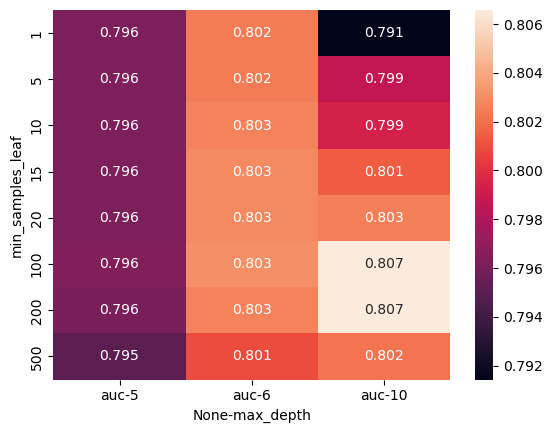

In [252]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [253]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100)

In [254]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 30.50
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |--- BMI <= 27.50
|   |   |   |   |   |   |   |--- Income <= 4.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Income >  4.50
|   |   |   |   |   |   |   |   |--- Income <= 7.50
|   |   |   |   |   |   |   |   |   |--- BMI <= 24.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- BMI >  24.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Income >  7.50
|   |   |   |   |   |   |   |   |   |--- BMI <= 21.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- BMI >  21.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- BMI >  27.50
|   |   |   |   |   |   |   |--- Age <= 5.50
|   

In [255]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)
dt.fit(X_train, y_train)
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- HighBP <= 0.50
|   |--- GenHlth <= 2.50
|   |   |--- Age <= 9.50
|   |   |   |--- BMI <= 30.50
|   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- GenHlth >  1.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- HighChol >  0.50
|   |   |   |   |   |--- BMI <= 23.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- BMI >  23.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- BMI >  30.50
|   |   |   |   |--- Age <= 6.50
|   |   |   |   |   |--- HighChol <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- HighChol >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- Age >  6.50
|   |   |   |   |   |--- GenHlth <= 1.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- GenHlth >  1.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |--- Age >  9.50
|   |   |   |--- BMI <= 25.50
|   |   |   |   |--- Income <

### Random forest

In [256]:
from sklearn.ensemble import RandomForestClassifier

In [257]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

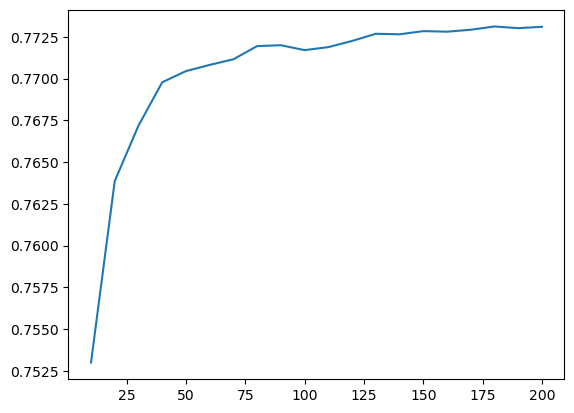

In [258]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

In [259]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [260]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

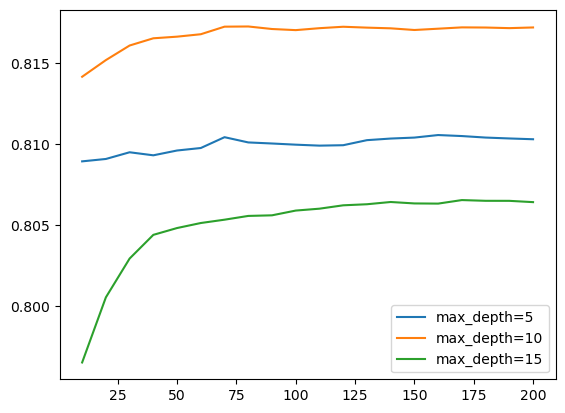

In [261]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [262]:
max_depth = 10

In [263]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 125, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [264]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

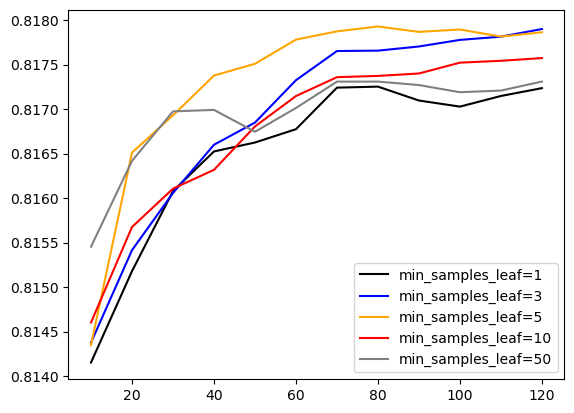

In [265]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [266]:
min_samples_leaf = 5

In [269]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=1)

In [270]:
y_pred = rf.predict_proba(X_val)[:, 1]
print( roc_auc_score(y_val, y_pred))

0.8178933316468744


### Xgboost

In [271]:
import xgboost as xgb

In [274]:
#get x and y after removing duplicates
def transform_io(df):
    df_nodup = df[selected_features].copy()
    dup_idx = df[df_nodup.duplicated()].index
    x = df_nodup.drop_duplicates(keep='first')
    train_dicts = x.to_dict(orient='records')
    dv = DictVectorizer()
    X_train = dv.fit_transform(train_dicts)
    
    df_y_nodup = df['Diabetes_binary'].copy()
    df_y_nodup.drop(dup_idx, inplace=True)
    y = df_y_nodup.values
    
    return X_train, y, dv

In [279]:
X_train, y_train, dv = transform_io(df_train)
X_val, y_val, dv = transform_io(df_val)
features = dv.get_feature_names_out()
print(features)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names= list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

['Age' 'BMI' 'DiffWalk' 'Education' 'GenHlth' 'HeartDiseaseorAttack'
 'HighBP' 'HighChol' 'Income' 'PhysHlth']


In [281]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [284]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [285]:
df_score = parse_xgb_output(output)

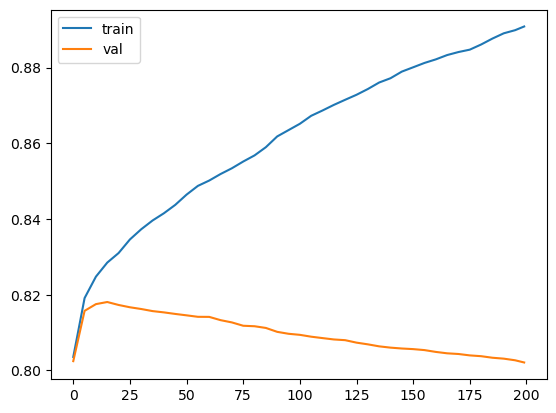

In [286]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [288]:
scores = {}


In [289]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [290]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [291]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [292]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [295]:
%%capture output

xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [296]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.5'

In [298]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [299]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [300]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.1', 'eta=0.5', 'eta=0.3'])

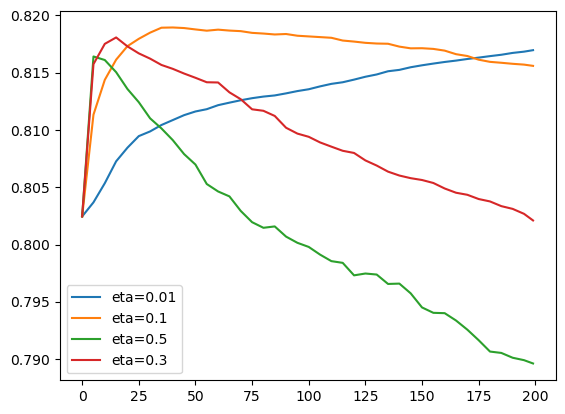

In [301]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

In [306]:
%%capture output

xgb_params = {
    'eta': 0.001, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [307]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.001'

In [308]:
%%capture output

xgb_params = {
    'eta': 0.005, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


In [309]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.005'

In [314]:
del scores['eta=0.005']
del scores['eta=0.5']
del scores['eta=0.3']

In [316]:
%%capture output

xgb_params = {
    'eta': 0.05, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [317]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [318]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [319]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.08'

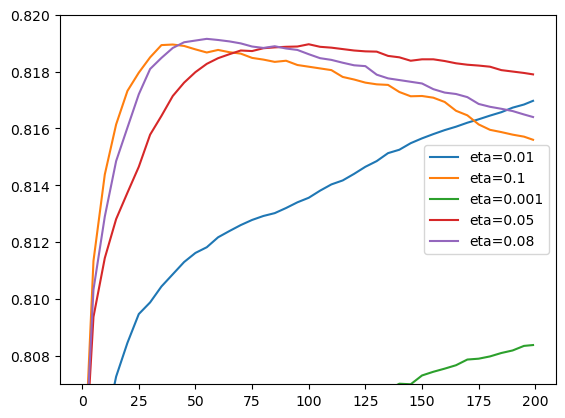

In [321]:
for key, df_score in scores.items():
        plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.ylim(0.807, 0.82)
plt.legend()

In [322]:
scores = {}

In [323]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [324]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [327]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 5,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [328]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=5'

In [329]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 20,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [330]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=20'

In [333]:
del scores['max_depth=20']

In [336]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 1,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [337]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=1'

In [338]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [339]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

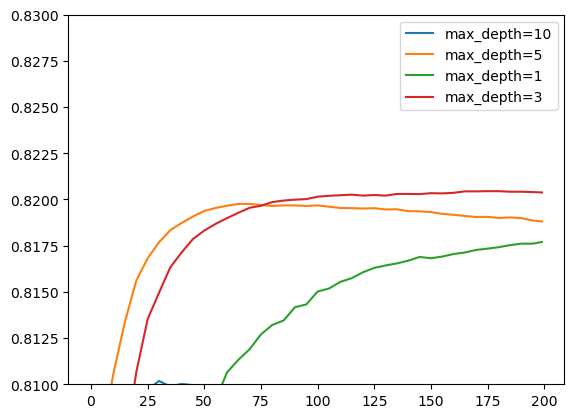

In [343]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.81, 0.83)
plt.legend()

In [344]:
scores = {}

In [345]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [346]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [347]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 3,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [348]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [349]:
%%capture output

xgb_params = {
    'eta': 0.08, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [350]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

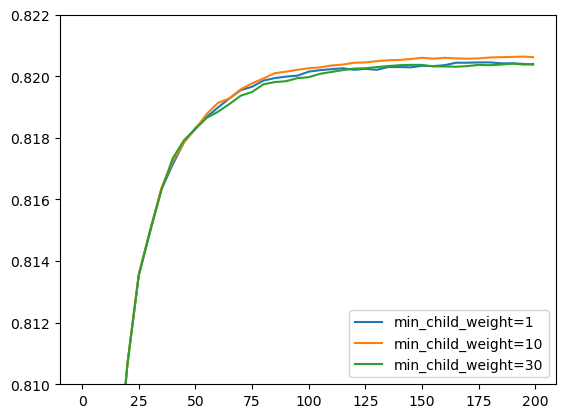

In [352]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.ylim(0.81, 0.822)
plt.legend()

Final Xgboost Model

In [354]:
xgb_params = {
    'eta': 0.08, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)

# Selecting final model

In [355]:
X_train, y_train, dv = transform_io(df_train)
X_val, y_val, dv = transform_io(df_val)

In [356]:
#logistic regression

def train(X_train, y_train, C=1.0):

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(X, dv, model):
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred


dv, model = train(X_train, y_train, C=0.5)
y_pred = predict(X_val, dv, model)

auc = roc_auc_score(y_val, y_pred)
print(auc)


0.8157204648179566


In [357]:
#Random forest

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=10,
                            min_samples_leaf=5,
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
print( roc_auc_score(y_val, y_pred))

0.8178933316468744


In [358]:
#Xg boost
X_train, y_train, dv = transform_io(df_train)
X_val, y_val, dv = transform_io(df_val)
features = dv.get_feature_names_out()
print(features)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names= list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features))

xgb_params = {
    'eta': 0.08, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

['Age' 'BMI' 'DiffWalk' 'Education' 'GenHlth' 'HeartDiseaseorAttack'
 'HighBP' 'HighChol' 'Income' 'PhysHlth']


0.8205775707390541

Selected Xg boost

# Final Model (Xgboost) testing

In [361]:
X_full_train, y_full_train, dv = transform_io(df_full_train)
X_test, y_test, dv = transform_io(df_test)
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names= list(features))
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=list(features))

xgb_params = {
    'eta': 0.08, 
    'max_depth': 3,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=150)
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8133283283511412